In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
gtd=pd.read_excel('/content/drive/MyDrive/globalterrorismdb_0919dist.xlsx')
gtd.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
cy = gtd.groupby(["country_txt","iyear"])
cy.first(5)

eventid  imonth  iday  ...  INT_IDEO  INT_MISC  INT_ANY
country_txt iyear                              ...                             
Afghanistan 1973   197305010002       5     1  ...         1         1        1
            1979   197902140010       2    14  ...        -9         1        1
            1987   198705310003       5    31  ...         0         0        0
            1988   198803270001       3    27  ...         1         1        1
            1989   198901110013       1    11  ...        -9         0       -9
...                         ...     ...   ...  ...       ...       ...      ...
Zimbabwe    2011   201106050013       6     5  ...        -9         0       -9
            2013   201302230037       2    23  ...         0         0        0
            2014   201402250012       2    25  ...         0         0        0
            2017   201707120016       7    12  ...         0         0        0
            2018   201806230002       6    23  ...        -9         0       -9

[3872 rows x 76 columns]

In [ ]:
cye = ((cy.count()).iloc[:,0]).to_frame()
cye.rename(columns={'eventid':'nattacks'},inplace=True)
cye = cye.reset_index()
cye.head(5)

,country_txt,iyear,nattacks
0,Afghanistan,1973,1
1,Afghanistan,1979,3
2,Afghanistan,1987,1
3,Afghanistan,1988,11
4,Afghanistan,1989,10


In [ ]:
cyk = cy.sum()[["nkill","nwound"]]
cyk = cyk.reset_index()
cyk['ncasual'] = cyk['nkill']+cyk['nwound']
cyk = cyk.drop(columns=['nkill','nwound'])
cyk.head(5)

,country_txt,iyear,ncasual
0,Afghanistan,1973,1.0
1,Afghanistan,1979,54.0
2,Afghanistan,1987,2.0
3,Afghanistan,1988,234.0
4,Afghanistan,1989,94.0


In [ ]:
tdf = pd.merge(left=cye, right=cyk, left_on=['country_txt','iyear'], right_on=['country_txt','iyear'])
tdf.head(5)

,country_txt,iyear,nattacks,ncasual
0,Afghanistan,1973,1,1.0
1,Afghanistan,1979,3,54.0
2,Afghanistan,1987,1,2.0
3,Afghanistan,1988,11,234.0
4,Afghanistan,1989,10,94.0


In [ ]:
tdf.describe()

,iyear,nattacks,ncasual
count,3872.000000,3872.000000,3872.000000
mean,1996.579545,49.448347,254.322056
std,13.213188,182.561072,1318.644823
min,1970.000000,1.000000,0.000000
25%,1986.000000,2.000000,1.000000
50%,1996.000000,5.000000,9.000000
75%,2008.000000,23.000000,80.000000
max,2018.000000,3934.000000,30769.000000


In [ ]:
pol=pd.read_excel('/content/drive/MyDrive/p5v2018.xls')
pol.head(5)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
polf = pol[['country','year','democ','autoc','durable']]
polf2 = polf.replace(to_replace=[-66,-88,np.NaN],method='pad')
polf2 = polf2.replace(to_replace=-77,value=0)
pt=pd.merge(left=polf2, right=tdf, right_on=['country_txt','iyear'], left_on=['country','year'])
pt=pt.drop(columns=['country_txt','iyear'])
pt.head(5)

,country,year,democ,autoc,durable,nattacks,ncasual
0,Afghanistan,1973,0,7,9.0,1,1.0
1,Afghanistan,1979,0,0,0.0,3,54.0
2,Afghanistan,1987,0,0,0.0,1,2.0
3,Afghanistan,1988,0,0,0.0,11,234.0
4,Afghanistan,1989,0,8,0.0,10,94.0


In [ ]:
import plotly.express as px
px.scatter(emp, x="durable", y="nattacks", labels={"nattacks":"No. of attacks in the year",'durable':'PS Score'},
                 title="Variation of no. of attacks with political stability")

In [ ]:
px.scatter(emp, x="democ", y="nattacks", labels={"nattacks":"No. of attacks in the year",'democ':'Democracy Score'},
                 title="Variation of no. of attacks with level of democracy")

In [ ]:
pwt=pd.read_excel('/content/drive/MyDrive/pwt91.xlsx',sheet_name='Data')
pwt.head(5)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eco = pwt[['country','year','rgdpna','rconna','hc','xr','pl_c','pop','emp']]
eco['%emp'] = eco['emp']/eco['pop']
eco2 = eco.drop(columns=['pop','emp'])
eco2 = eco2.fillna(method='pad')
pet = pd.merge(left=pt, right=eco2, right_on=['country','year'], left_on=['country','year'])
pet.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,democ,autoc,durable,nattacks,ncasual,rgdpna,rconna,hc,xr,pl_c,%emp
0,Albania,1981,0,9,35.0,1,0.0,13540.036133,8038.579590,1.950753,7.000000,0.209760,0.391950
1,Albania,1990,3,2,0.0,1,0.0,14465.879883,10925.688477,2.516159,7.559302,0.183802,0.406555
2,Albania,1991,3,2,0.0,1,0.0,10415.124023,10349.219727,2.515733,9.914172,0.190120,0.405223
3,Albania,1992,6,1,0.0,3,1.0,9666.577148,12127.018555,2.515308,32.276627,0.245260,0.327174
4,Albania,1994,6,1,2.0,2,1.0,11469.972656,12048.912109,2.514457,94.623337,0.194902,0.342752


In [ ]:
urb=pd.read_csv('/content/drive/MyDrive/urban-and-rural-population.csv')
urb.head(5)

,Entity,Code,Year,Rural population,Urban population
0,Afghanistan,AFG,1960,8240568,755783
1,Afghanistan,AFG,1961,8370722,796042
2,Afghanistan,AFG,1962,8506983,838885
3,Afghanistan,AFG,1963,8649584,884370
4,Afghanistan,AFG,1964,8798513,932848


In [ ]:
urb['%urb']=urb['Urban population']/(urb['Urban population']+urb['Rural population'])
urb2=urb.drop(columns=['Rural population','Urban population'])
pet2 = pd.merge(left=pet, right=urb2, right_on=['Entity','Year'], left_on=['country','year'])
pet2 = pet2.drop(columns=['Entity','Year','Code'])
pet2.head(5)

,country,year,democ,autoc,durable,nattacks,ncasual,rgdpna,rconna,hc,xr,pl_c,%emp,%urb
0,Albania,1981,0,9,35.0,1,0.0,13540.036133,8038.579590,1.950753,7.000000,0.209760,0.391950,0.34024
1,Albania,1990,3,2,0.0,1,0.0,14465.879883,10925.688477,2.516159,7.559302,0.183802,0.406555,0.36428
2,Albania,1991,3,2,0.0,1,0.0,10415.124023,10349.219727,2.515733,9.914172,0.190120,0.405223,0.36700
3,Albania,1992,6,1,0.0,3,1.0,9666.577148,12127.018555,2.515308,32.276627,0.245260,0.327174,0.37249
4,Albania,1994,6,1,2.0,2,1.0,11469.972656,12048.912109,2.514457,94.623337,0.194902,0.342752,0.38354


In [ ]:
pet2.describe()

,year,democ,autoc,durable,nattacks,ncasual,rgdpna,rconna,hc,xr,pl_c,%emp,%urb
count,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2.931000e+03,2.931000e+03,2931.000000,2.931000e+03,2931.000000,2931.000000,2931.000000
mean,1995.883657,5.372569,2.075401,26.194132,51.153872,258.908222,6.835587e+05,5.054469e+05,2.283838,2.554648e+02,0.456399,0.382270,0.553426
std,12.915336,4.042908,2.988050,35.802085,186.085297,1363.246165,1.841329e+06,1.370458e+06,0.724643,1.023241e+03,0.264242,0.089278,0.231991
min,1970.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.092194e+02,3.264803e+02,1.016205,1.987854e-12,0.074133,0.141347,0.054910
25%,1986.000000,0.000000,0.000000,3.000000,2.000000,1.000000,2.915252e+04,2.497279e+04,1.678491,8.873974e-01,0.264507,0.320265,0.361520
50%,1996.000000,7.000000,0.000000,12.000000,5.000000,10.000000,1.393272e+05,1.056443e+05,2.237210,3.375062e+00,0.383353,0.384363,0.569000
75%,2007.000000,9.000000,4.000000,34.000000,26.000000,94.000000,4.948247e+05,3.680458e+05,2.864000,6.055261e+01,0.560459,0.445314,0.747060
max,2017.000000,10.000000,10.000000,208.000000,3934.000000,30769.000000,1.897850e+07,1.461053e+07,3.807068,1.338941e+04,1.660743,0.840488,1.000000


In [ ]:
ftdf=pet2[['democ','autoc','durable','rgdpna','rconna','hc','xr','pl_c','%emp','%urb','nattacks','ncasual']]
ftdf.rename(columns={'rgdpna':'GDP','rconna':'Consumption','hc':'HCI','xr':'XR','pl_c':'CP','democ':'DS','autoc':'AS','durable':'PSS'},inplace=True)
ftdf

,DS,AS,PSS,GDP,Consumption,HCI,XR,CP,%emp,%urb,nattacks,ncasual
0,0,9,35.0,13540.036133,8038.579590,1.950753,7.000000,0.209760,0.391950,0.34024,1,0.0
1,3,2,0.0,14465.879883,10925.688477,2.516159,7.559302,0.183802,0.406555,0.36428,1,0.0
2,3,2,0.0,10415.124023,10349.219727,2.515733,9.914172,0.190120,0.405223,0.36700,1,0.0
3,6,1,0.0,9666.577148,12127.018555,2.515308,32.276627,0.245260,0.327174,0.37249,3,1.0
4,6,1,2.0,11469.972656,12048.912109,2.514457,94.623337,0.194902,0.342752,0.38354,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2926,3,2,1.0,21020.130859,21571.501953,2.372605,1.000000,0.492063,0.504385,0.33196,1,2.0
2927,3,2,2.0,24266.843750,24453.617188,2.415823,1.000000,0.531112,0.510499,0.33015,1,0.0
2928,5,1,0.0,29393.619141,30008.541016,2.504635,1.000000,0.577488,0.525694,0.32654,3,2.0
2929,5,1,1.0,30018.845703,29834.322266,2.550258,1.000000,0.600760,0.533499,0.32504,1,0.0


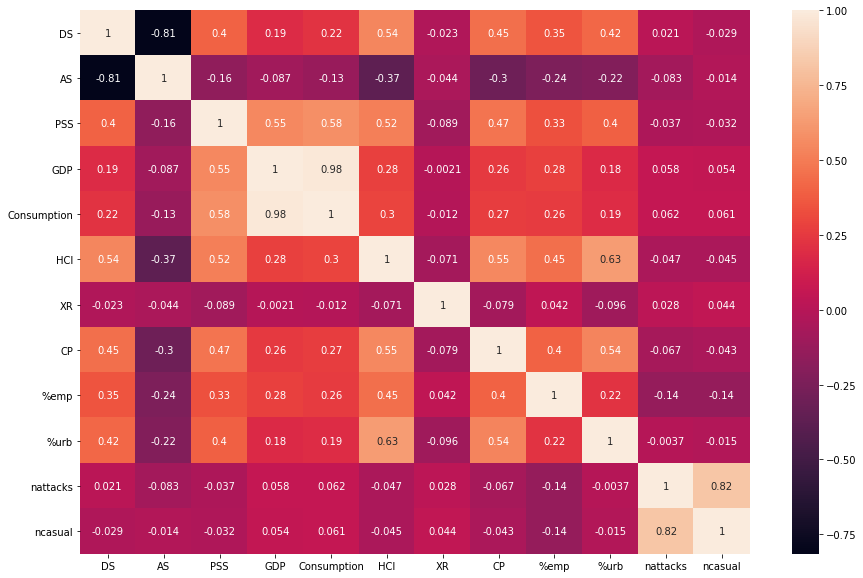

In [ ]:
import matplotlib.pyplot as plt
CM=ftdf.corr()
fig,ax=plt.subplots(figsize=(15,10))
import seaborn as sn
sn.heatmap(CM,annot=True)

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
Y = ftdf[['nattacks','ncasual']]
X = ftdf.iloc[:,:-2]
from sklearn import preprocessing as pp
for col in X.columns:
  X[col]=pp.scale(X[col])
from sklearn.model_selection import train_test_split
X_train,X2,Y_train,Y2 = train_test_split(X,Y,test_size = 0.3)
X_val,X_test,Y_val,Y_test = train_test_split(X2,Y2,test_size = 0.5)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(2051, 10) (2051, 2) (440, 10) (440, 2) (440, 10) (440, 2)


In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LM = LinearRegression()
LM.fit(X_train,Y_train)
Y_pred = LM.predict(X_val)
from sklearn.metrics import mean_absolute_error as mae
print("Error = "+str(mae(Y_pred,Y_val)))

Error = 236.5785522709913


In [ ]:
# Lasso Regression Model
from sklearn.linear_model import Lasso
for alpha in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
  print("Alpha = "+str(alpha))
  LsM = Lasso(alpha=alpha)
  LsM.fit(X_train,Y_train)
  Y_pred = LsM.predict(X_val)
  print(f'MAE: {mae(Y_val,Y_pred)}')

Alpha = 0.0001
MAE: 236.5784174136624
Alpha = 0.001
MAE: 236.57720380313833
Alpha = 0.01
MAE: 236.56506634480132
Alpha = 0.1
MAE: 236.44143829552195
Alpha = 1
MAE: 235.26734994002064
Alpha = 10
MAE: 228.58813236314592
Alpha = 100
MAE: 210.2574127416962
Alpha = 1000
MAE: 210.8597646380916


In [ ]:
# Random Forest Regression Model 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [10,50,100,500,1000]
max_features = ['auto','sqrt','log2']
max_depth = [10,50,100,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
rf = RandomForestRegressor()
rfr = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
rfr.fit(X_train,Y_train)
rfr.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2,max_features='sqrt')
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_val)
print(f'MAE: {mae(Y_val,Y_pred)}')

MAE: 97.00239772727265


In [ ]:
# Multi-Layer Perceptron Regression (NN) Model
from sklearn.neural_network import MLPRegressor
neurons = [(10, ),(25, ),(50, ),(75, ),(100, )]
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
solver = ['lbfgs','sgd','adam']
activation = ['identity', 'logistic', 'tanh', 'relu']
max_iter = [100,200,500]
learning_rate = ['constant', 'invscaling', 'adaptive']
momentum = [0.1,0.25,0.5,0.75,1]
batch_size = [32,64,100,200]
param_grid = {'hidden_layer_sizes': neurons,
              'alpha': alphas,
              'solver': solver,
              'activation': activation,
              'max_iter': max_iter,
              'learning_rate': learning_rate,
              'batch_size': batch_size,
              'momentum': momentum}
mlp = MLPRegressor()
mlpr = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid)
mlpr.fit(X_train,Y_train)
mlpr.best_params_

{'activation': 'relu',
 'alpha': 10,
 'batch_size': 100,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'invscaling',
 'max_iter': 500,
 'momentum': 0.5,
 'solver': 'sgd'}

In [ ]:
mlpr = MLPRegressor(activation = 'relu', 
                     alpha = 10, 
                     batch_size = 100, 
                     hidden_layer_sizes = (10,), 
                     learning_rate = 'invscaling',
                     max_iter = 500,
                     momentum = 0.5,
                     solver = 'sgd')
mlpr.fit(X_train,Y_train)
Y_pred = mlpr.predict(X_val)
print(f'MAE: {mae(Y_val,Y_pred)}')

MAE: 198.1283956363979


In [ ]:
# KNN Regression Model 
from sklearn.neighbors import KNeighborsRegressor
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'leaf_size': leaf_size,
              'n_neighbors': n_neighbors,
              'algorithm': algorithm,
              'weights': weights}
kn = KNeighborsRegressor()
knr = RandomizedSearchCV(estimator = kn, param_distributions = param_grid)
knr.fit(X_train,Y_train)
knr.best_params_

{'algorithm': 'brute', 'leaf_size': 7, 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
knr = KNeighborsRegressor(algorithm='brute', leaf_size=7, n_neighbors=5, weights='distance')
knr.fit(X_train,Y_train)
Y_pred = knr.predict(X_val)
print(f'MAE: {mae(Y_val,Y_pred)}')

MAE: 88.1334790354555


In [ ]:
Y_pred2 = knr.predict(X_test)
print(f'MAE: {mae(Y_test,Y_pred2)}')

MAE: 121.76702424556888


### **ML with PWT all variables**

In [ ]:
et = pd.merge(left=pwt, right=tdf, left_on=['country','year'], right_on=['country_txt','iyear'])
et = et.drop(columns=['country_txt','iyear'])
etcr = et.corr()['nattacks'].to_frame()
cols = list(etcr.index.values)
etdf = et[cols]
etdf = etdf.fillna(method='pad')
etdf = etdf.dropna()
etdf.head(5)

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,nattacks,ncasual
61,1970,87146.429688,86579.468750,23.973059,9.167639,2006.000000,2.075176,69970.515625,82998.242188,84411.234375,87115.445312,91701.671875,0.006833,0.662791,0.629576,275319.78125,188887.859375,231989.453125,556773.6250,0.279862,1.172821,0.993609,0.441482,0.287064,0.048087,3.791667e-11,0.372737,0.402607,0.390109,0.136159,88.888901,0.734197,0.149546,0.068996,0.094328,-0.061317,0.014250,0.362089,0.563032,0.486044,0.215781,0.316113,0.601848,7.373267,21,7.0
62,1971,91185.812500,89191.328125,24.366440,9.252183,2002.661133,2.096463,72556.578125,87185.562500,88036.070312,89387.320312,99202.718750,0.006946,0.653970,0.633812,285675.00000,197141.843750,245401.546875,596506.9375,0.300149,1.161166,1.002888,0.441482,0.293410,0.045841,4.521667e-11,0.429677,0.461814,0.454832,0.136159,88.888901,0.740781,0.163658,0.070929,0.074232,-0.061849,0.012248,0.417877,0.621204,0.552914,0.262281,0.333822,0.655774,7.745020,7,5.0
63,1972,93362.085938,90744.726562,24.782949,9.340870,1999.327759,2.117969,73314.367188,88153.703125,89725.593750,90610.351562,107544.968750,0.007048,0.632638,0.610026,291610.46875,200300.343750,249040.437500,635241.6250,0.321966,1.130678,0.970864,0.441482,0.273830,0.044037,8.015264e-11,0.394708,0.422490,0.418365,0.136159,88.888901,0.739399,0.163771,0.069718,0.046891,-0.036692,0.016913,0.387253,0.559747,0.473775,0.284993,0.357305,0.595895,6.513371,20,5.0
64,1973,98596.804688,95838.812500,25.213388,9.430356,1996.000000,2.139695,75911.171875,90153.765625,94199.078125,95195.960938,114546.718750,0.006987,0.641206,0.606722,302528.78125,209316.343750,255179.312500,666870.3750,0.340020,1.128766,0.957272,0.441482,0.273563,0.042470,1.256670e-10,0.415854,0.440217,0.435608,0.136159,88.888901,0.726959,0.149613,0.070461,0.050660,-0.030748,0.033055,0.397919,0.570073,0.600893,0.269452,0.303839,0.610615,6.471691,60,20.0
65,1974,103148.546875,100340.453125,25.644506,9.771413,1992.842163,2.161644,81302.773438,96190.195312,99065.328125,100111.773438,122806.609375,0.007219,0.662322,0.636346,318883.21875,224201.531250,270103.968750,700088.0625,0.358957,1.132027,0.964071,0.441482,0.249165,0.040830,1.499692e-10,0.451901,0.480864,0.475838,0.136159,88.888901,0.739501,0.148708,0.072619,0.050967,-0.038747,0.026951,0.423730,0.639037,0.738772,0.256839,0.312409,0.706611,6.643593,71,33.0


In [ ]:
fig = px.scatter(etdf, x="hc", y="nattacks", size="pop",
                 labels={"nattacks":"No. of attacks in the year",'hc':'HCI for the year'},
                 title="Variation of no. of attacks with HCI for all years with differing populations of countries")
fig.show()

In [ ]:
px.scatter(etdf, x="rgdpna", y="nattacks", size="pop",
                 labels={"nattacks":"No. of attacks in the year",'rgdpna':'GDP for the year'},
                 title="Variation of no. of attacks with GDP for all years with differing populations of countries")

In [ ]:
px.scatter(etdf, x="pl_c", y="nattacks", size="pop",
                 labels={"nattacks":"No. of attacks in the year",'pl_c':'Consumer price level for the year'},
                 title="Variation of no. of attacks with consumer price levels for all years with differing populations of countries")

In [ ]:
emp = pd.merge(left=pt, right=eco, right_on=['country','year'], left_on=['country','year'])
px.scatter(emp, x="%emp", y="nattacks", labels={"nattacks":"No. of attacks in the year",'%emp':'% people employed'},
                 title="Variation of no. of attacks with employment rate for all years & countries")

In [ ]:
Y = etdf[['nattacks','ncasual']]
X = etdf.iloc[:,:-2]
for col in X.columns:
  X[col]=pp.scale(X[col])
X_train,X2,Y_train,Y2 = train_test_split(X,Y,test_size = 0.3)
X_val,X_test,Y_val,Y_test = train_test_split(X2,Y2,test_size = 0.5)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(2109, 44) (2109, 2) (452, 44) (452, 2) (452, 44) (452, 2)


In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LM = LinearRegression()
LM.fit(X_train,Y_train)
Y_pred = LM.predict(X_val)
from sklearn.metrics import mean_absolute_error as mae
print("Error = "+str(mae(Y_pred,Y_val)))

Error = 297.4922977139675


In [ ]:
# Lasso Regression Model
for alpha in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
  print("Alpha = "+str(alpha))
  LsM = Lasso(alpha=alpha)
  LsM.fit(X_train,Y_train)
  Y_pred = LsM.predict(X_val)
  print(f'MAE: {mae(Y_val,Y_pred)}')

Alpha = 0.0001
MAE: 291.26254699161774
Alpha = 0.001
MAE: 291.2491699949436
Alpha = 0.01
MAE: 291.1166384113303
Alpha = 0.1
MAE: 289.9152811903927
Alpha = 1
MAE: 281.3082316681064
Alpha = 10
MAE: 261.27405583832507
Alpha = 100
MAE: 238.63920445029643
Alpha = 1000
MAE: 244.10760352807281


In [ ]:
# Random Forest Regression Model 
n_estimators = [10,50,100,500,1000]
max_features = ['auto','sqrt','log2']
max_depth = [10,50,100,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
rf = RandomForestRegressor()
rfr = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
rfr.fit(X_train,Y_train)
rfr.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
rf = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=5,max_features='log2',n_estimators=500)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_val)
print(f'MAE: {mae(Y_val,Y_pred)}')

MAE: 140.46239501484263


In [ ]:
# KNN Regression Model 
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'leaf_size': leaf_size,
              'n_neighbors': n_neighbors,
              'algorithm': algorithm,
              'weights': weights}
kn = KNeighborsRegressor()
knr = RandomizedSearchCV(estimator = kn, param_distributions = param_grid)
knr.fit(X_train,Y_train)
knr.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 24,
 'n_neighbors': 9,
 'weights': 'distance'}

In [ ]:
knr = KNeighborsRegressor(algorithm='ball_tree', leaf_size=24, n_neighbors=9, weights='distance')
knr.fit(X_train,Y_train)
Y_pred = knr.predict(X_val)
print(f'MAE: {mae(Y_val,Y_pred)}')

MAE: 114.85331769391435


In [ ]:
Y_pred2 = knr.predict(X_test)
print(f'MAE: {mae(Y_test,Y_pred2)}')

MAE: 111.83456196886246


### **ML with DPI all variables**

In [ ]:
dpi=pd.read_excel('/content/drive/MyDrive/dpi2012.xls')
dpi.head(5)

,countryname,ifs,year,system,yrsoffc,finittrm,yrcurnt,multpl,military,defmin,percent1,percentl,prtyin,execme,execrlc,execnat,execrurl,execreg,execrel,execage,allhouse,nonchief,totalseats,gov1me,gov1seat,gov1vote,gov1rlc,gov1nat,gov1rurl,gov1reg,gov1rel,gov1age,gov2me,gov2seat,gov2vote,gov2rlc,gov2nat,gov2rurl,gov2reg,gov2rel,...,pluralty,pr,housesys,sensys,thresh,dhondt,cl,select,fraud,auton,muni,state,author,stconst,gwno,numgov,numvote,numopp,oppvote,maj,partyage,herfgov,herfopp,herftot,frac,oppfrac,govfrac,tensys_strict,tensys,checks_lax,checks,stabs_strict,stabs,stabns_strict,stabns,tenlong_strict,tenlong,tenshort_strict,tenshort,polariz
0,South Sudan,NaN,2011,Presidential,1.0,NaN,NaN,1.0,1.0,1.0,92.989998,-999.0,1.0,SPLM,0,1.0,0.0,0.0,0,28.0,-999.0,-999,0,NaN,0.0,0.0,-999,-999.0,-999.0,-999.0,-999,-999.0,NaN,0.0,0.0,-999,-999.0,-999.0,-999.0,-999,...,-999.0,-999.0,-999,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999,-999,-999.0,-999.0,NaN,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0
1,South Sudan,NaN,2012,Presidential,2.0,NaN,NaN,1.0,1.0,1.0,92.989998,-999.0,2.0,SPLM,0,1.0,0.0,0.0,0,29.0,NaN,NaN,332,South Sudan Regional Assembly Members,170.0,NaN,0,0.0,0.0,0.0,0,-999.0,Former Members of Sudanese Assembly,96.0,NaN,0,0.0,0.0,0.0,0,...,1.0,1.0,Plurality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,332,0.0,0,0.0,1.000,NaN,0.385324,NaN,NaN,0.616533,NaN,0.616533,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
2,Turk Cyprus,0,1975,-999,1.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,NaN,-999.0,independent,0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999,0,NaN,0.0,0.0,-999,-999.0,-999.0,-999.0,-999,-999.0,NaN,0.0,0.0,-999,-999.0,-999.0,-999.0,-999,...,-999.0,-999.0,-999,-999,2.0,-999.0,-999.0,-999,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turk Cyprus,0,1976,Presidential,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,-999.0,independent,0,1.0,0.0,0.0,0,NaN,1.0,-999,0,NaN,0.0,0.0,-999,-999.0,-999.0,-999.0,-999,-999.0,NaN,0.0,0.0,-999,-999.0,-999.0,-999.0,-999,...,-999.0,-999.0,-999,-999,2.0,-999.0,-999.0,-999,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0
4,Turk Cyprus,0,1977,Presidential,2.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN,-999.0,independent,Right,1.0,0.0,0.0,0,NaN,1.0,-999,40,UBP,29.0,NaN,0,-999.0,-999.0,-999.0,-999,-999.0,NaN,0.0,0.0,-999,-999.0,-999.0,-999.0,-999,...,NaN,NaN,-999,-999,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,29,0.0,11,0.0,0.725,NaN,1.000000,0.371901,NaN,0.457692,0.690909,0.000000,1.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0


In [ ]:
dpit = pd.merge(left=dpi, right=tdf, left_on=['countryname','year'], right_on=['country_txt','iyear'])
dpit = dpit.drop(columns=['country_txt','iyear'])
dpit = dpit.replace(to_replace=[-999,'-999',888,np.NaN],method='pad')
ptcr = dpit.corr()['nattacks'].to_frame()
cols = list(ptcr.index.values)
tpdf = dpit[cols]
tpdf = tpdf.dropna()
tpdf.head(5)

,year,yrsoffc,finittrm,yrcurnt,multpl,military,defmin,percent1,percentl,prtyin,execnat,execrurl,execreg,execage,allhouse,totalseats,gov1seat,gov1vote,gov1nat,gov1rurl,gov1reg,gov1age,gov2seat,gov2vote,gov2nat,gov2rurl,gov2reg,gov2age,gov3seat,gov3vote,gov3nat,gov3rurl,gov3reg,gov3age,govoth,govothst,govothvt,opp1seat,opp1vote,opp1nat,...,mdmh,mdms,ssh,pluralty,pr,thresh,dhondt,cl,fraud,auton,author,stconst,gwno,numgov,numvote,numopp,oppvote,maj,partyage,herfgov,herfopp,herftot,frac,oppfrac,govfrac,tensys_strict,tensys,checks_lax,checks,stabs_strict,stabs,stabns_strict,stabns,tenlong_strict,tenlong,tenshort_strict,tenshort,polariz,nattacks,ncasual
75,1984,1.0,1.0,5.0,0.0,0.0,0.0,51.799999,-999.0,1.0,0.0,0.0,0.0,13.0,1.0,253,129.0,46.810001,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,111.0,37.080002,0.0,...,10.7,5.0,0.15,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,160.0,129,46.810001,124,43.710003,0.509881,13.0,1.0,0.802184,0.262551,0.549495,0.199425,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,46,5.0
76,1985,2.0,1.0,4.0,0.0,0.0,0.0,51.799999,-999.0,2.0,0.0,0.0,0.0,14.0,1.0,254,130.0,46.810001,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,111.0,37.080002,1.0,...,10.7,5.0,0.15,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,160.0,130,46.810001,124,43.710003,0.511811,13.5,1.0,0.802184,0.262551,0.549028,0.199425,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,43,12.0
77,1986,3.0,1.0,3.0,0.0,0.0,0.0,51.799999,-999.0,3.0,0.0,0.0,0.0,15.0,1.0,255,130.0,45.000000,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,98.0,36.000000,1.0,...,10.7,5.0,0.15,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,160.0,130,45.000000,125,37.000000,0.509804,14.5,1.0,0.624448,0.262551,0.592373,0.378581,0.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,33,14.0
78,1987,4.0,1.0,2.0,0.0,0.0,0.0,51.799999,-999.0,4.0,0.0,0.0,0.0,16.0,1.0,242,117.0,45.000000,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,98.0,36.000000,1.0,...,10.7,5.0,0.15,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,160.0,117,45.000000,125,37.000000,0.483471,15.5,1.0,0.624448,0.262551,0.602140,0.378581,0.0,4.0,4.0,5.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,1.0,80,14.0
79,1988,5.0,1.0,1.0,0.0,0.0,0.0,51.799999,-999.0,5.0,0.0,0.0,0.0,17.0,1.0,254,117.0,37.500000,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,105.0,41.500000,1.0,...,10.7,5.0,0.15,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,160.0,117,37.500000,137,56.200001,0.460630,16.5,1.0,0.602003,0.262551,0.615107,0.400923,0.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,1.0,33,21.0


In [ ]:
Y = tpdf[['nattacks','ncasual']]
X = tpdf.iloc[:,:-2]
for col in X.columns:
  X[col]=pp.scale(X[col])
X_train,X2,Y_train,Y2 = train_test_split(X,Y,test_size = 0.3)
X_val,X_test,Y_val,Y_test = train_test_split(X2,Y2,test_size = 0.5)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(1758, 99) (1758, 2) (377, 99) (377, 2) (377, 99) (377, 2)


In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LM = LinearRegression()
LM.fit(X_train,Y_train)
Y_pred = LM.predict(X_val)
from sklearn.metrics import mean_absolute_error as mae
print("Error = "+str(mae(Y_pred,Y_val)))

Error = 212.02138350648934


In [ ]:
# Lasso Regression Model
for alpha in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
  print("Alpha = "+str(alpha))
  LsM = Lasso(alpha=alpha)
  LsM.fit(X_train,Y_train)
  Y_pred = LsM.predict(X_val)
  print(f'MAE: {mae(Y_val,Y_pred)}')

Alpha = 0.0001
MAE: 211.813159912646
Alpha = 0.001
MAE: 211.799638264836
Alpha = 0.01
MAE: 211.66423259036517
Alpha = 0.1
MAE: 210.45141021196335
Alpha = 1
MAE: 202.5746373393881
Alpha = 10
MAE: 184.02183988590593
Alpha = 100
MAE: 169.30411531947374
Alpha = 1000
MAE: 169.54289824764774


In [ ]:
# KNN Regression Model 
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'leaf_size': leaf_size,
              'n_neighbors': n_neighbors,
              'algorithm': algorithm,
              'weights': weights}
kn = KNeighborsRegressor()
knr = RandomizedSearchCV(estimator = kn, param_distributions = param_grid)
knr.fit(X_train,Y_train)
knr.best_params_

{'algorithm': 'brute', 'leaf_size': 13, 'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
knr = KNeighborsRegressor(algorithm='brute', leaf_size=13, n_neighbors=2, weights='uniform')
knr.fit(X_train,Y_train)
Y_pred = knr.predict(X_val)
print(f'MAE: {mae(Y_val,Y_pred)}')

MAE: 75.39323607427056


In [ ]:
# Random Forest Regression Model 
n_estimators = [10,50,100,500,1000]
max_features = ['auto','sqrt','log2']
max_depth = [10,50,100,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
rf = RandomForestRegressor()
rfr = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
rfr.fit(X_train,Y_train)
rfr.best_params_

{'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf = RandomForestRegressor(max_depth=100, min_samples_leaf=1, min_samples_split=2,max_features='sqrt',n_estimators=500)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_val)
print(f'MAE: {mae(Y_val,Y_pred)}')

MAE: 92.80931299734748


In [ ]:
Y_pred2 = knr.predict(X_test)
print(f'MAE: {mae(Y_test,Y_pred2)}')

MAE: 86.5212201591512


### **ML with DPI + PWT all variables**

In [ ]:
sdf = pd.merge(left=et, right=dpit, left_on=['country','year'], right_on=['countryname','year'])
sdf = sdf.drop(columns='countryname')
sdf2 = pd.merge(left=sdf, right=tdf, right_on=['country_txt','iyear'], left_on=['country','year'])
sdf2 = sdf2.drop(columns=['country_txt','iyear'])
sdf2.head(5)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,...,thresh,dhondt,cl,select,fraud,auton,muni,state,author,stconst,gwno,numgov,numvote,numopp,oppvote,maj,partyage,herfgov,herfopp,herftot,frac,oppfrac,govfrac,tensys_strict,tensys,checks_lax,checks,stabs_strict,stabs,stabns_strict,stabns,tenlong_strict,tenlong,tenshort_strict,tenshort,polariz,nattacks_y,ncasual_y,nattacks,ncasual
0,AGO,Angola,Kwanza,1977,28553.203125,27101.019531,8.130988,4.111429,NaN,1.033385,17619.222656,29540.142578,29523.966797,29907.011719,122009.898438,0.008438,0.378766,0.370193,52434.265625,31600.042969,54795.781250,325087.68750,0.281604,1.096590,1.555816,0.284879,0.133542,0.054001,2.991800e-08,0.185118,0.147142,0.145258,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.384857,...,NaN,0.0,NaN,Sub-National,1.0,0.0,No local elections,No local elections,NaN,1.0,540.0,0,0.0,0,0.0,1.0,16.0,0.440953,NaN,NaN,0.559967,NaN,0.559967,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1,0.0,1,0.0
1,AGO,Angola,Kwanza,1978,26960.931641,24654.347656,8.376147,4.209530,NaN,1.035939,16726.623047,27895.578125,27811.552734,27140.650391,126813.929688,0.008258,0.334602,0.340293,49655.250000,30133.330078,52019.875000,330076.18750,0.286917,1.016097,1.445179,0.284879,0.119614,0.054638,2.991800e-08,0.219009,0.174225,0.178532,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.402589,...,NaN,0.0,NaN,Sub-National,1.0,0.0,No local elections,No local elections,NaN,1.0,540.0,0,0.0,0,0.0,1.0,16.0,0.440953,NaN,NaN,0.559967,NaN,0.559967,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,2,40.0,2,40.0
2,AGO,Angola,Kwanza,1979,26972.591797,24989.894531,8.641521,4.290003,NaN,1.038498,16675.804688,27713.929688,27741.820312,27744.730469,130812.039062,0.008036,0.339942,0.338174,49804.214844,30158.552734,51966.476562,334428.40625,0.291393,1.001437,1.418610,0.284879,0.117047,0.054897,2.991800e-08,0.243390,0.193937,0.193916,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.385554,...,NaN,0.0,NaN,Sub-National,1.0,0.0,No local elections,No local elections,NaN,1.0,540.0,0,0.0,0,0.0,1.0,16.0,0.440953,NaN,NaN,0.559967,NaN,0.559967,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,3,49.0,3,49.0
3,AGO,Angola,Kwanza,1981,27320.917969,25177.261719,9.244507,4.429433,NaN,1.050381,17333.101562,28087.843750,28357.640625,28261.199219,135649.484375,0.007034,0.364325,0.363332,48755.539062,30713.261719,52308.902344,340643.43750,0.296586,0.960447,1.398967,0.284879,0.106402,0.054509,2.991800e-08,0.286812,0.236022,0.236827,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.421231,...,NaN,0.0,NaN,Sub-National,0.0,0.0,No local elections,Legislature locally elected,NaN,1.0,540.0,206,0.0,0,0.0,1.0,25.0,1.000000,NaN,NaN,0.000000,NaN,0.000000,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1,3.0,1,3.0
4,AGO,Angola,Kwanza,1982,27721.228516,25342.080078,9.582156,4.567910,NaN,1.059781,18161.634766,30436.417969,28917.636719,28452.271484,138688.765625,0.007128,0.362752,0.387061,48755.539062,32299.861328,56100.042969,346764.81250,0.303045,0.937791,1.464966,0.284879,0.102921,0.054621,2.991800e-08,0.284310,0.231451,0.235237,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.420710,...,NaN,0.0,NaN,Sub-National,0.0,0.0,No local elections,Legislature locally elected,NaN,1.0,540.0,223,0.0,0,0.0,1.0,26.0,1.000000,NaN,NaN,0.000000,NaN,0.000000,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,2,2.0,2,2.0


In [ ]:
sdf2 = sdf2.fillna(method='pad')
sdf2 = sdf2.dropna()
scr = sdf2.corr()['nattacks'].to_frame()
cols = list(scr.index.values)
stdf= sdf2[cols]
stdf

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,...,ssh,pluralty,pr,thresh,dhondt,cl,fraud,auton,author,stconst,gwno,numgov,numvote,numopp,oppvote,maj,partyage,herfgov,herfopp,herftot,frac,oppfrac,govfrac,tensys_strict,tensys,checks_lax,checks,stabs_strict,stabs,stabns_strict,stabns,tenlong_strict,tenlong,tenshort_strict,tenshort,polariz,nattacks_y,ncasual_y,nattacks,ncasual
80,1978,302657.687500,304091.343750,14.309298,6.057281,1913.286377,3.162793,216124.828125,308240.343750,304320.875000,307772.156250,8.935581e+05,0.051764,0.859189,0.851449,363644.750000,242295.625000,295451.218750,1.082695e+06,0.216963,0.923483,0.788953,0.682669,0.039476,0.031583,0.873659,0.461642,0.446514,0.441507,-0.001414,93.333336,0.580896,0.299298,0.121327,0.145076,-0.130008,-0.016589,0.426816,0.411021,0.628384,...,0.33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,900.0,86,48.099998,38,39.599998,0.693548,61.0,0.655760,1.000000,0.262551,0.595463,0.000000,0.348290,48.0,48.0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,2,11.0,2,11.0
81,1979,313169.500000,314012.625000,14.473242,6.137320,1918.704956,3.187977,220348.531250,313440.906250,314487.750000,318412.656250,9.450630e+05,0.050994,0.866235,0.849217,374740.062500,247013.593750,300899.156250,1.123365e+06,0.227379,0.922320,0.778729,0.671457,0.042017,0.031513,0.894641,0.495453,0.478355,0.472459,-0.001414,93.333336,0.573089,0.292364,0.118933,0.161842,-0.132188,-0.014040,0.457155,0.437886,0.679993,...,0.33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,900.0,86,48.099998,38,39.599998,0.693548,62.0,0.655760,1.000000,0.262551,0.595463,0.000000,0.348290,49.0,49.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,2,9.0,2,9.0
82,1980,323898.031250,324801.156250,14.649114,6.303638,1919.110229,3.213360,230255.953125,334341.281250,327855.250000,330956.125000,9.948601e+05,0.051432,0.880203,0.895769,387319.625000,255988.375000,317991.281250,1.172549e+06,0.241439,0.913047,0.788229,0.672304,0.041003,0.031483,0.878244,0.552218,0.529112,0.524155,-0.001414,93.333336,0.574615,0.314499,0.121115,0.172730,-0.150476,-0.032482,0.507084,0.477999,0.766348,...,0.33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,900.0,86,48.099998,38,39.599998,0.693548,63.0,0.655760,1.000000,0.262551,0.595463,0.000000,0.348290,50.0,50.0,4.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,6,5.0,6,5.0
83,1981,340093.375000,339712.437500,14.838494,6.382690,1900.644165,3.232605,241976.109375,355395.406250,344615.937500,345013.062500,1.046344e+06,0.054886,0.881501,0.911142,400192.656250,267710.906250,336605.687500,1.225490e+06,0.256566,0.919483,0.813223,0.677483,0.039207,0.031553,0.870215,0.612088,0.586432,0.585757,-0.001414,93.333336,0.582466,0.328739,0.118887,0.156892,-0.161620,-0.025364,0.559645,0.531697,0.869023,...,0.33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,900.0,74,46.300003,51,45.099998,0.592000,64.0,0.605552,1.000000,0.262551,0.626323,0.000000,0.399852,51.0,51.0,5.0,5.0,0.0,0.0,0.0,0.0,6.0,6.0,6.0,6.0,2.0,1,1.0,1,1.0
84,1982,331381.906250,331161.968750,15.041065,6.366415,1881.506592,3.251965,248746.078125,345657.843750,337254.875000,338058.968750,1.081041e+06,0.054678,0.875390,0.892790,391253.781250,274268.218750,327966.125000,1.265217e+06,0.265390,0.893209,0.787295,0.675741,0.036035,0.031611,0.985863,0.596123,0.569640,0.568285,-0.001414,93.333336,0.610488,0.286671,0.125319,0.158753,-0.167434,-0.013797,0.545843,0.501666,0.841060,...,0.33,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,900.0,74,46.300003,51,45.099998,0.592000,65.0,0.605552,1.000000,0.262551,0.626323,0.000000,0.399852,52.0,52.0,5.0,5.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,7.0,2.0,2,3.0,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
Y = tpdf[['nattacks','ncasual']]
X = tpdf.iloc[:,:-2]
for col in X.columns:
  X[col]=pp.scale(X[col])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(2009, 99) (2009, 2) (503, 99) (503, 2)


In [ ]:
# KNN Regression Model 
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'leaf_size': leaf_size,
              'n_neighbors': n_neighbors,
              'algorithm': algorithm,
              'weights': weights}
kn = KNeighborsRegressor()
knr = RandomizedSearchCV(estimator = kn, param_distributions = param_grid)
knr.fit(X_train,Y_train)
knr.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 41,
 'n_neighbors': 16,
 'weights': 'distance'}

In [ ]:
knr = KNeighborsRegressor(algorithm='ball_tree', leaf_size=41, n_neighbors=16, weights='distance')
knr.fit(X_train,Y_train)
Y_pred = knr.predict(X_test)
print(f'MAE: {mae(Y_test,Y_pred)}')

MAE: 99.54370558842716
